In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import *


#Reading the training data and observing the variables

Training_data= pd.read_csv("train.csv")

#Reading Testing data

Testing_data= pd.read_csv("test.csv")

Training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
Training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

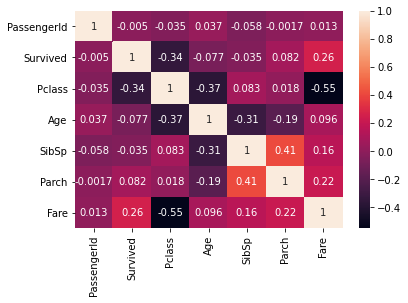

In [124]:
sns.heatmap(Training_data.corr(), annot = True)

In [125]:
Training_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [126]:
#Checking for NAN values
Training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
#Removing the null values
Training_data['Age'] = Training_data['Age'].fillna(Training_data['Age'].mean())

# Training_data['Embarked']=Training_data['Embarked'].fillna(Training_data['Embarked'].mode)

Training_data['Cabin'] = Training_data['Cabin'].fillna('Emp')

Training_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
Title           0
Sex_cat         0
Embarked_Cat    0
Title_Cat       0
dtype: int64

In [140]:
#Taking out the titles in the name
Training_data['Title'] = Training_data['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1])

#same for Test
Testing_data['Title'] =Testing_data['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1])

Testing_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [141]:
#Replace similar Titles with already existing ones
Training_data['Title'].replace(['Dr','Rev','Major','Col','Mlle','Ms','Sir','Countess','Jonkheer','Mme','Capt','Don','Lady'],'Upper',inplace=True)


Testing_data['Title'].replace(['Dr','Rev','Major','Col','Mlle','Ms','Sir','Countess','Jonkheer','Mme','Capt','Don','Lady','Dona'],'Upper',inplace=True)

# Training_data.groupby('Title').Survived.mean()

Testing_data['Title'] .value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Upper       7
Name: Title, dtype: int64

In [142]:
# obj_df["body_style"] = obj_df["body_style"].astype('category')
# obj_df.dtypes

#Encoding String Variables
Training_data['Sex']=Training_data['Sex'].astype('category')
Training_data['Sex_cat']=Training_data['Sex'].cat.codes

Training_data['Embarked']=Training_data['Embarked'].astype('category')
Training_data['Embarked_Cat']=Training_data['Embarked'].cat.codes

Training_data['Title']=Training_data['Title'].astype('category')
Training_data['Title_Cat']=Training_data['Title'].cat.codes

Training_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_cat,Embarked_Cat,Title_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Emp,S,Mr,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Emp,S,Miss,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Emp,S,Mr,1,2,2


In [131]:
Testing_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [143]:

#Encoding String Variables
Testing_data['Sex']=Testing_data['Sex'].astype('category')
Testing_data['Sex_cat']=Testing_data['Sex'].cat.codes

Testing_data['Embarked']=Testing_data['Embarked'].astype('category')
Testing_data['Embarked_Cat']=Testing_data['Embarked'].cat.codes

Testing_data['Title']=Testing_data['Title'].astype('category')
Testing_data['Title_Cat']=Testing_data['Title'].cat.codes

Testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_cat,Embarked_Cat,Title_Cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Emp,Q,Mr,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Emp,S,Mrs,0,2,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Emp,Q,Mr,1,1,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Emp,S,Mr,1,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Emp,S,Mrs,0,2,3


In [144]:
#Checking nulls
Testing_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
Sex_cat         0
Embarked_Cat    0
Title_Cat       0
dtype: int64

In [145]:
#Fix Nulls

#Removing the null values
Testing_data['Age'] = Testing_data['Age'].fillna(Testing_data['Age'].mean())
Testing_data['Fare'] = Testing_data['Fare'].fillna(Testing_data['Fare'].mean())

Testing_data['Cabin'] = Testing_data['Cabin'].fillna('Emp')

Testing_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
Sex_cat         0
Embarked_Cat    0
Title_Cat       0
dtype: int64

In [148]:
#Setting up Training data

train_x= Training_data[['Pclass','Age','SibSp','Parch','Fare','Sex_cat','Embarked_Cat','Title_Cat']]

train_y=Training_data.loc[:,'Survived']

#train model
clf =  svm.SVC(kernel='linear', C = 1.0)
clf.fit(train_x,train_y)

SVC(kernel='linear')

In [149]:
test_x= Testing_data[['Pclass','Age','SibSp','Parch','Fare','Sex_cat','Embarked_Cat','Title_Cat']]

# test_y=Testing_data.loc[:,'Survived']

pred_y=clf.predict(test_x)

# pred_y=pred_y.round(0)

Predicted_output= pd.DataFrame({"PassengerId":Testing_data["PassengerId"],"Survived":pred_y})

Predicted_output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [150]:
#Storing result in a file

Predicted_output.to_csv('Titanicoutput4.csv',index=False)
Predicted_output.shape

(418, 2)